# Data Breaches - The Worlds largest #

Data Breaches are a constant threat in today's society, with large organisations realising that hackers are not always the biggest threat to losing data. In this exercise we will explore the trends of data breaches from 2004-2018, where we will use visualization techniques to examine data breaches, as well as Machine Learning using Natural Language processing to understand if we can categorize a type of breach using the story that was associated with it. 

This NLP technique would allow someone to scrape through media documents, organisation emails, text blocks and determine the category that a breach might fit in. Therefore allowing organisations to follow trends on threats year by year to determine where they need to focus their efforts to stop a data breach occuring. For example, you will notice trends that in recent years where 'accidentally published' or 'inside job' are making emerging trends.

#### Table Of Contents
1.[Imports](#Imports) <br />
2.[Data Cleaning](#DataCleaning)<br />
3.[Understanding Our Data](#hacks) <br />
3.1.[Hacking?](#Hacking?) <br />
3.2.[WordCloud - Hacking](#wordcloud) <br />
4.[Natural Language Processing](#NLP) <br />
4.1 [Tokenizer](#tokenizer)<br />
4.2[TF-IDF](#tfidf)

##  1. [Imports](#Imports)

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud
from PIL import Image
from os import path
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv('../security/data_breaches_2018.csv')

In [3]:
#view our data
df

,Entity,alternative name,story,YEAR,YEAR(2),records lost,ORGANISATION,METHOD OF LEAK,interesting story,NO OF RECORDS STOLEN,DATA SENSITIVITY,UNUSED,UNUSED.1,Exclude,Unnamed: 14,1st source link,2nd source link,3rd source,source name
0,NaN,NaN,Elaboration if there's an interesting story or...,"years are encoded (0=2004, 8 = 2012, 9 = 2013,...",NaN,"(use 3m, 4m, 5m or 10m to approximate unknown ...",NaN,NaN,NaN,"(use 3m, 4m, 5m or 10m to approximate unknown ...",1. Just email address/Online information 20 SS...,NaN,NaN,Show this item in the viz?,NaN,NaN,NaN,NaN,NaN
1,AOL,American Online,A former America Online software engineer stol...,0,2004.0,92000000,web,inside job,NaN,92000000,1,NaN,NaN,NaN,NaN,http://money.cnn.com/2004/06/23/technology/aol...,http://www.msnbc.msn.com/id/8985989/#.UFcN8RgUwaA,NaN,CNN
2,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...",CardSystems was fingered by MasterCard after i...,1,2005.0,40000000,financial,hacked,y,40000000,300,NaN,NaN,NaN,NaN,http://www.msnbc.msn.com/id/8260050/ns/technol...,NaN,NaN,MSNBC
3,Ameritrade Inc.,Computer backup tape containing personal infor...,online broker,1,2005.0,200000,financial,lost / stolen device or media,NaN,200000,20,NaN,NaN,NaN,NaN,http://www.nbcnews.com/id/7561268/,NaN,NaN,NBC
4,Citigroup,NaN,Blame the messenger! A box of computer tapes c...,1,2005.0,3900000,financial,lost / stolen device or media,y,3900000,300,NaN,NaN,NaN,NaN,http://www.nytimes.com/2005/06/07/business/07d...,NaN,NaN,NY Times
5,Automatic Data Processing,"Business outsourcing, payrolls, benefits",NaN,1,2005.0,125000,financial,poor security,NaN,130000,20,NaN,NaN,NaN,NaN,http://abcnews.go.com/Technology/story?id=2160...,NaN,NaN,ABC
6,AOL,American Online,Durp. AOL VOLUNTARILY released search data for...,2,2006.0,20000000,web,accidentally published,y,20000000,1,NaN,NaN,NaN,NaN,http://techcrunch.com/2006/08/06/aol-proudly-r...,NaN,NaN,Tech Crunch
7,KDDI,Japanese telecommunications operator,"Press report: ""Tokyo police have arrested two ...",2,2006.0,4000000,telecoms,hacked,y,4000000,1,NaN,NaN,NaN,NaN,http://www.computerworld.com/s/article/9001150...,NaN,NaN,Computer World
8,Countrywide Financial Corp,Mortgage financer,NaN,2,2006.0,2600000,financial,inside job,NaN,2600000,300,NaN,NaN,NaN,NaN,http://www.idtheftcenter.org/artman2/publish/l...,NaN,NaN,ITRC
9,Hewlett Packard,NaN,Laptop lost/stolen containing employee data: n...,2,2006.0,200000,"tech, retail",lost / stolen device or media,y,200000,20,NaN,NaN,NaN,NaN,http://news.cnet.com/Laptop-with-HP-employee-d...,NaN,NaN,CNET


## [Cleaning Our Data](#DataCleaning) ##

Here we will look at our data and clean it for later analysis. 

In [5]:
#drop the first row as this is unnecesary data
df.head(1)
df.drop(df.head(1).index, inplace=True)


In [6]:
#understand the column headers and shape of our dataframe
print(df.columns)
df.shape

Index([u'Entity', u'alternative name', u'story', u'YEAR', u'YEAR(2)',
       u'records lost', u'ORGANISATION', u'METHOD OF LEAK',
       u'interesting story', u'NO OF RECORDS STOLEN', u'DATA SENSITIVITY',
       u'UNUSED', u'UNUSED.1', u'Exclude', u'Unnamed: 14', u'1st source link',
       u'2nd source link', u'3rd source', u'source name'],
      dtype='object')


(293, 19)

In [7]:
#we now only have 18 columns
df = df.loc[:, df.columns.notnull()]
print(df.columns)
df.shape

Index([u'Entity', u'alternative name', u'story', u'YEAR', u'YEAR(2)',
       u'records lost', u'ORGANISATION', u'METHOD OF LEAK',
       u'interesting story', u'NO OF RECORDS STOLEN', u'DATA SENSITIVITY',
       u'UNUSED', u'UNUSED.1', u'Exclude', u'Unnamed: 14', u'1st source link',
       u'2nd source link', u'3rd source', u'source name'],
      dtype='object')


(293, 19)

In [8]:
#Our last 90 rows are all NaN values. We will drop these
#df.tail(90)
#df.drop(df.tail(90).index, inplace=True)


In [9]:
df.tail(10)

,Entity,alternative name,story,YEAR,YEAR(2),records lost,ORGANISATION,METHOD OF LEAK,interesting story,NO OF RECORDS STOLEN,DATA SENSITIVITY,UNUSED,UNUSED.1,Exclude,Unnamed: 14,1st source link,2nd source link,3rd source,source name
284,Careem,Dubai-born ride hailing service,Apr. Careem's official blog stated there was n...,14,2018.0,14000000,app,hacked,NaN,14000000,20,NaN,NaN,NaN,NaN,https://www.khaleejtimes.com/nation/dubai//dub...,NaN,NaN,Khaleej Times
285,Texas voter records,NaN,Aug. A single file containing 14.8 million rec...,14,2018.0,14800000,web,poor security,NaN,14800000,20,NaN,NaN,NaN,NaN,https://techcrunch.com/2018/08/23/millions-of-...,NaN,NaN,TechCrunch
286,T-Mobile,NaN,T-Mobile initially said that personal data was...,14,2018.0,2000000,telecoms,hacked,NaN,2000000,1,NaN,NaN,NaN,NaN,https://motherboard.vice.com/en_us/article/a3q...,NaN,NaN,Motherboard
287,British Airways,NaN,Aug. Personal and financial details of custome...,14,2018.0,380000,transport,hacked,NaN,380000,4000,NaN,NaN,NaN,NaN,https://www.theguardian.com/business/2018/sep/...,NaN,NaN,Guardian
288,Newegg,NaN,Sep. Hackers injected 15 lines of card skimmin...,14,2018.0,45000000,retail,hacked,NaN,45000000,300,NaN,NaN,NaN,NaN,https://yro.slashdot.org/story/18/09/19/141724...,NaN,NaN,Slashdot
289,Grindr,NaN,Mar. A third-party tool that allows users to s...,14,2018.0,3000000,app,poor security,NaN,3000000,300,NaN,NaN,NaN,NaN,https://www.nbcnews.com/feature/nbc-out/securi...,NaN,NaN,NBC News
290,Health South East,Health authority responsible for 10 Norwegian ...,Jan. Health data was stolen from more than hal...,14,2018.0,3000000,healthcare,hacked,NaN,3000000,4000,NaN,NaN,NaN,NaN,https://www.itgovernance.eu/blog/en/breach-at-...,NaN,NaN,It Governance
291,TicketFly,NaN,"May. Names, addresses, email addresses and pho...",14,2018.0,27000000,web,hacked,NaN,27000000,20,NaN,NaN,NaN,NaN,https://support.ticketfly.com/s/article/41507,NaN,NaN,TicketFly
292,LocalBlox,datasearch service,May. A cloud storage repository was left publi...,14,2018.0,48000000,web,poor security,NaN,48000000,20,NaN,NaN,NaN,NaN,https://www.upguard.com/breaches/s3-localblox,NaN,NaN,UpGuard
293,Facebook,NaN,Apr. Malicious third-party scrapers collected ...,14,2018.0,2200000000,web,hacked,NaN,2200000000,20,NaN,NaN,NaN,NaN,https://thehackernews.com/2018/04/facebook-dat...,NaN,NaN,The Hacker News


In [10]:
df['interesting story'] = df['interesting story'].fillna(0)

In [11]:
df['interesting story'] = df['interesting story'].str.replace('y','1')
df['interesting story'] = df['interesting story'].fillna(0)
df

,Entity,alternative name,story,YEAR,YEAR(2),records lost,ORGANISATION,METHOD OF LEAK,interesting story,NO OF RECORDS STOLEN,DATA SENSITIVITY,UNUSED,UNUSED.1,Exclude,Unnamed: 14,1st source link,2nd source link,3rd source,source name
1,AOL,American Online,A former America Online software engineer stol...,0,2004.0,92000000,web,inside job,0,92000000,1,NaN,NaN,NaN,NaN,http://money.cnn.com/2004/06/23/technology/aol...,http://www.msnbc.msn.com/id/8985989/#.UFcN8RgUwaA,NaN,CNN
2,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...",CardSystems was fingered by MasterCard after i...,1,2005.0,40000000,financial,hacked,1,40000000,300,NaN,NaN,NaN,NaN,http://www.msnbc.msn.com/id/8260050/ns/technol...,NaN,NaN,MSNBC
3,Ameritrade Inc.,Computer backup tape containing personal infor...,online broker,1,2005.0,200000,financial,lost / stolen device or media,0,200000,20,NaN,NaN,NaN,NaN,http://www.nbcnews.com/id/7561268/,NaN,NaN,NBC
4,Citigroup,NaN,Blame the messenger! A box of computer tapes c...,1,2005.0,3900000,financial,lost / stolen device or media,1,3900000,300,NaN,NaN,NaN,NaN,http://www.nytimes.com/2005/06/07/business/07d...,NaN,NaN,NY Times
5,Automatic Data Processing,"Business outsourcing, payrolls, benefits",NaN,1,2005.0,125000,financial,poor security,0,130000,20,NaN,NaN,NaN,NaN,http://abcnews.go.com/Technology/story?id=2160...,NaN,NaN,ABC
6,AOL,American Online,Durp. AOL VOLUNTARILY released search data for...,2,2006.0,20000000,web,accidentally published,1,20000000,1,NaN,NaN,NaN,NaN,http://techcrunch.com/2006/08/06/aol-proudly-r...,NaN,NaN,Tech Crunch
7,KDDI,Japanese telecommunications operator,"Press report: ""Tokyo police have arrested two ...",2,2006.0,4000000,telecoms,hacked,1,4000000,1,NaN,NaN,NaN,NaN,http://www.computerworld.com/s/article/9001150...,NaN,NaN,Computer World
8,Countrywide Financial Corp,Mortgage financer,NaN,2,2006.0,2600000,financial,inside job,0,2600000,300,NaN,NaN,NaN,NaN,http://www.idtheftcenter.org/artman2/publish/l...,NaN,NaN,ITRC
9,Hewlett Packard,NaN,Laptop lost/stolen containing employee data: n...,2,2006.0,200000,"tech, retail",lost / stolen device or media,1,200000,20,NaN,NaN,NaN,NaN,http://news.cnet.com/Laptop-with-HP-employee-d...,NaN,NaN,CNET
10,"T-Mobile, Deutsche Telecom",NaN,Thieves got their hands on a storage device wi...,2,2006.0,17000000,telecoms,lost / stolen device or media,0,17000000,1,NaN,NaN,NaN,NaN,http://www.datalossdb.org,http://www.informationweek.com/security/attack...,NaN,Data Loss Database


##  [Data Breaches](#hacks) ##
### What are the main causes of Data Breaches ###

In [12]:
#Show the companies that have had data breaches in 2018
df.Entity.value_counts()

Yahoo                                              3
Facebook                                           3
Citigroup                                          3
AOL                                                3
Sony Pictures                                      2
Aadhaar                                            2
US Military                                        2
Uber                                               2
AT&T                                               2
British Airways                                    2
Countrywide Financial Corp                         2
Twitter                                            2
Dropbox                                            2
JP Morgan Chase                                    2
Kromtech                                           1
Spartanburg Regional Healthcare System             1
Three Iranian banks                                1
UK Home Office                                     1
Anthem                                        

In [13]:
df['METHOD OF LEAK'].value_counts()

hacked                           181
lost / stolen device or media     50
poor security                     24
inside job                        19
accidentally published            19
Name: METHOD OF LEAK, dtype: int64

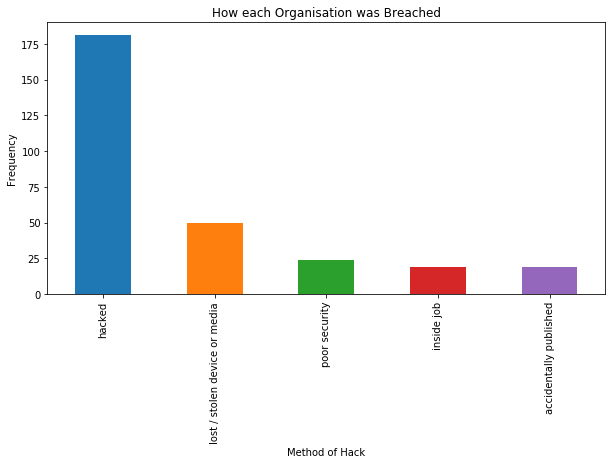

In [14]:
#Drawing a barplot for the most frequent breaches of data
ax = df['METHOD OF LEAK'].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="How each Organisation was Breached")
ax.set_xlabel("Method of Hack")
ax.set_ylabel("Frequency");

It's interesting to note that hacking was by far the highest cause when it comes to data breaches for big companies. It would be interesting to know how the hackings occur in these companies and if there is a pattern of occurence.

In [15]:
#extract the year and method of breach
leaked_year = df[['METHOD OF LEAK','YEAR(2)']]
eight = leaked_year[leaked_year['YEAR(2)'] == 2018]
seven = leaked_year[leaked_year['YEAR(2)'] == 2017]
six= leaked_year[leaked_year['YEAR(2)'] == 2016]
five= leaked_year[leaked_year['YEAR(2)'] == 2015]
print(six)
#leaked_year['YEAR(2)'].value_counts()

df['YEAR(2)'].value_counts()

             METHOD OF LEAK  YEAR(2)
216  accidentally published   2016.0
217                  hacked   2016.0
218                  hacked   2016.0
219                  hacked   2016.0
220                  hacked   2016.0
221                  hacked   2016.0
222                  hacked   2016.0
223                  hacked   2016.0
224                  hacked   2016.0
225                  hacked   2016.0
226                  hacked   2016.0
227                  hacked   2016.0
228                  hacked   2016.0
229                  hacked   2016.0
230                  hacked   2016.0
231              inside job   2016.0
232           poor security   2016.0
233                  hacked   2016.0


2017.0    39
2011.0    36
2013.0    31
2012.0    26
2014.0    25
2015.0    23
2018.0    21
2010.0    20
2016.0    18
2008.0    16
2009.0    14
2007.0    13
2006.0     6
2005.0     4
2004.0     1
Name: YEAR(2), dtype: int64

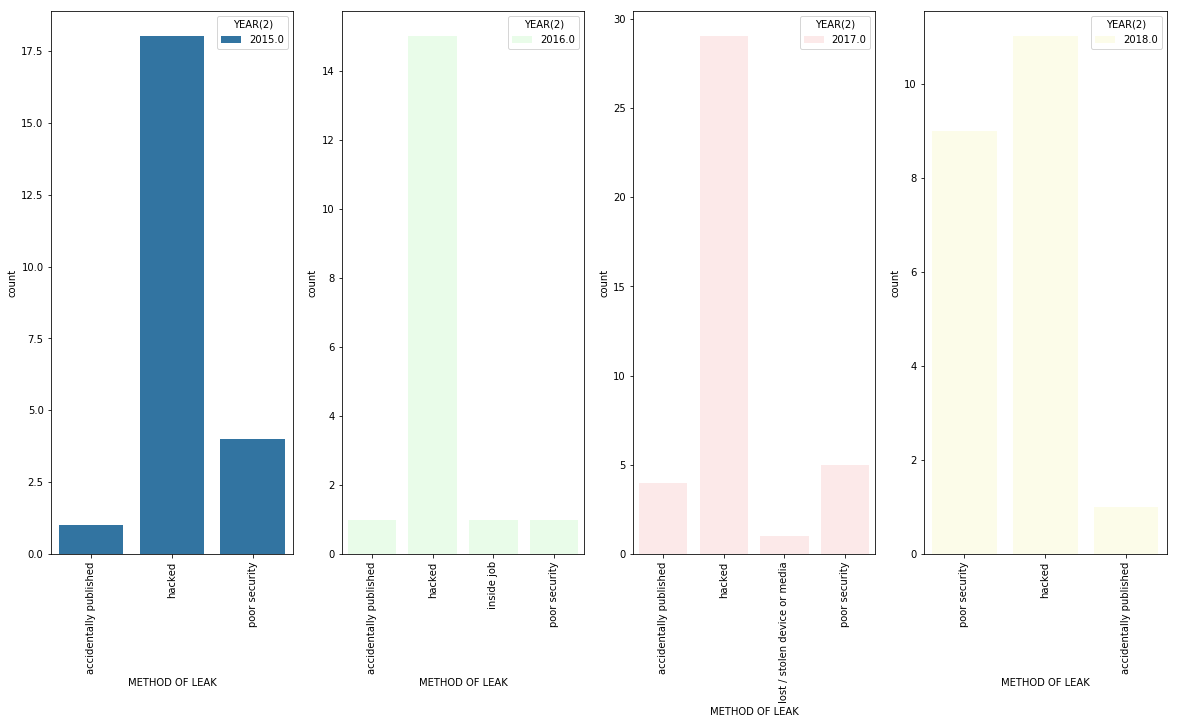

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x="METHOD OF LEAK", hue="YEAR(2)", data=five, ax=axes[0])
sns.countplot(x="METHOD OF LEAK", hue="YEAR(2)", data=six, color='green', ax=axes[1])
sns.countplot(x="METHOD OF LEAK", hue="YEAR(2)", data=seven, color='red', ax=axes[2])
sns.countplot(x="METHOD OF LEAK", hue="YEAR(2)", data=eight, color='yellow', ax=axes[3])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

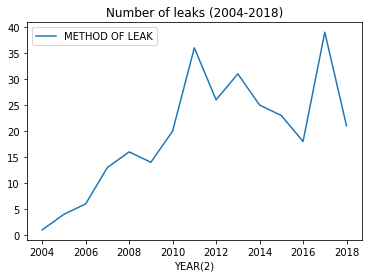

In [17]:
#Plotting a line graph to look at the trend of all leaks between 2004 to 2018
leaked_year.groupby('YEAR(2)').count().plot(kind='line', title='Number of leaks (2004-2018)')

What we can analyse from these graphs is that since 2004, Leaks/Data Breaches have increased substantially in large corporations, and since 2015 the standout means of data breaches come from hacks. 

### [What Does Hacking Mean?](#Hacking?)
Here we will try to understand what determines a hack. We will analyze the text fields in the dataframe of data breaches to see what the main causes of data breaches were when a company stated their data was hacked. 

In [18]:
hacked_df = df[df['METHOD OF LEAK'] == 'hacked']
hacked_df.columns

Index([u'Entity', u'alternative name', u'story', u'YEAR', u'YEAR(2)',
       u'records lost', u'ORGANISATION', u'METHOD OF LEAK',
       u'interesting story', u'NO OF RECORDS STOLEN', u'DATA SENSITIVITY',
       u'UNUSED', u'UNUSED.1', u'Exclude', u'Unnamed: 14', u'1st source link',
       u'2nd source link', u'3rd source', u'source name'],
      dtype='object')

In [19]:
(hacked_df['interesting story'] == 'y').value_counts()

False    181
Name: interesting story, dtype: int64

In [20]:
hacked_df = hacked_df.reset_index(drop=True)
#hacked_df['story_str'] = hacked_df.story.astype(str)
hacked_df[:3]


,Entity,alternative name,story,YEAR,YEAR(2),records lost,ORGANISATION,METHOD OF LEAK,interesting story,NO OF RECORDS STOLEN,DATA SENSITIVITY,UNUSED,UNUSED.1,Exclude,Unnamed: 14,1st source link,2nd source link,3rd source,source name
0,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...",CardSystems was fingered by MasterCard after i...,1,2005.0,40000000,financial,hacked,1,40000000,300,NaN,NaN,NaN,NaN,http://www.msnbc.msn.com/id/8260050/ns/technol...,NaN,NaN,MSNBC
1,KDDI,Japanese telecommunications operator,"Press report: ""Tokyo police have arrested two ...",2,2006.0,4000000,telecoms,hacked,1,4000000,1,NaN,NaN,NaN,NaN,http://www.computerworld.com/s/article/9001150...,NaN,NaN,Computer World
2,Monster.com,Jobs website,A trojan virus stole log-ins that were used to...,3,2007.0,1600000,web,hacked,1,1600000,20,NaN,NaN,NaN,NaN,http://news.bbc.co.uk/1/hi/6956349.stm,NaN,NaN,BBC


### [WordCloud - Understanding Common Terms used in Hacking Cases](#wordcloud)

We will look at deploying WordCloud, which is a common data visualization technique used to show common words in the text fields, with the size of the words relating to the frequency used.  

In [21]:
#Create a list of all lists in the story column
#This will allow wordcloud to assess all words, not just go column by column
lst = hacked_df.story
def flatten(lst):
    for elem in lst:
        if type(elem) in (tuple, list):
            for i in flatten(elem):
                yield i
        else:
            yield elem
            
hacked_lists = list(flatten(lst))
hacked_lists

["CardSystems was fingered by MasterCard after it spotted fraud on credit card accounts and found a common thread, tracing it back to CardSystems.  An unauthorized entity put a specific code into CardSystems' network, enabling the person or group to gain access to the data. It's not clear how many of the 40 million accounts were actually stolen. ",
 'Press report: "Tokyo police have arrested two men for trying to extort nearly US$90,000 from KDDI Corp. The pair allegedly threatened to disclose the existence of storage media containing personal data belonging to four million KDDI customers prior to a shareholder meeting; however, KDDI alerted the police as soon as they were contacted by the blackmailers; the police monitored communications between KDDI and the pair for several weeks. "',
 'A trojan virus stole log-ins that were used to harvest user names, e-mail addresses, home addresses and phone numbers. Soon after phishing e-mails encouraged users to download a Monster Job Seeker Too

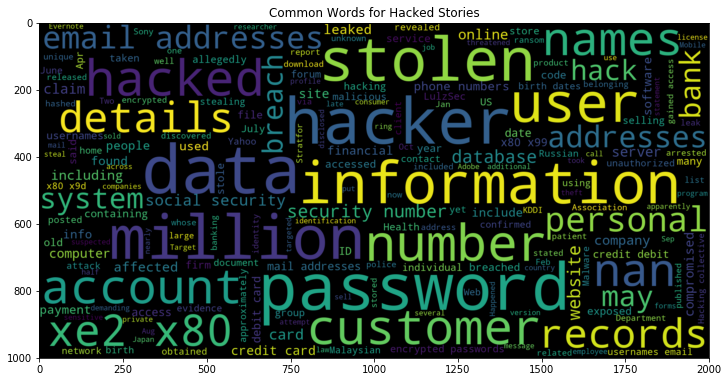

In [22]:
wordcloud = WordCloud(width=2000, height=1000, max_font_size=200).generate(str(hacked_lists))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Common Words for Hacked Stories")
plt.show()

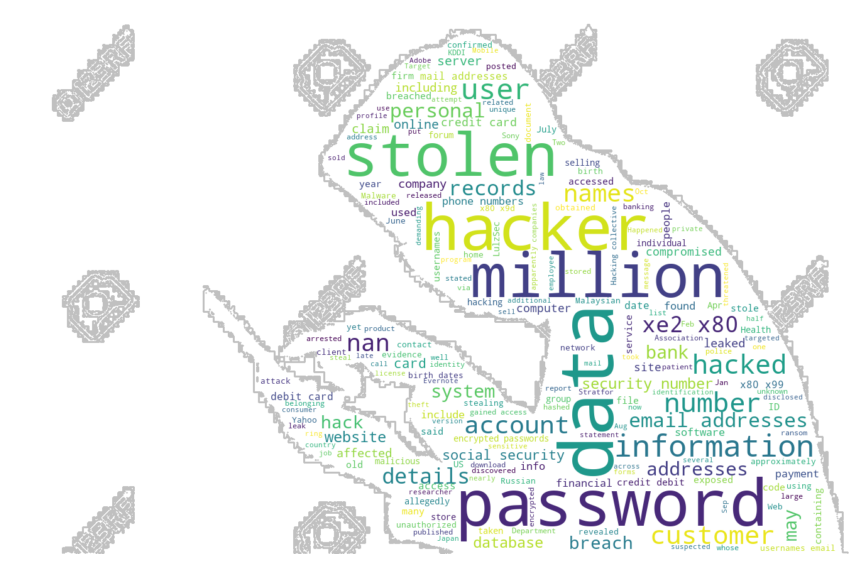

In [23]:
#Let's make it fancy
hackerman = np.array(Image.open("../security/hackerman.jpg"))
wc = WordCloud(background_color="white", mask=hackerman, contour_width=3, contour_color='silver').generate(str(hacked_lists))
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Using WordCloud actually can be somewhat helpful. We can see when it comes to systems/companies that have been hacked, common words are used such as 'password', 'data', 'social security'. From this we can assume that hackers target highly protected data and expose it. Financial hacks are quite common as can be seen by observing the words that appear, as well as email addresses. 

Below we will look into Tokenizing and lemmatizing the word field to try and correctly predict the categories each data breach fits in too.  

# [Natural Language Processing](#NLP)

### [Tokenizer](#tokenizer) ###

Here is the tokenizer function which will be used to normalise and breakdown the Story text field into a list of words. 

In [24]:
#Function to tokenize and normalize our words used in the stories
def tokenize(text):
    """
    Normalize, tokenize and stem text into words
    
    Args:
    text, a string of words 
       
    Returns:
    stem, array of strings containing words
    """
    #lower case and remove special punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ",text.lower())
    #split using tokenizer
    words = word_tokenize(text)
    #remove stopwords to reduce vocab & use stem
    words = [w for w in words if w not in stopwords.words("english")]
    
    return words

In [25]:
#assigning a new column for the story text field and converting it to a string object
df = df.reset_index(drop=True) # reset the index
#df.story.reset_index(drop=True)
x = hacked_df.story[0]
#check our tokenizer works
(tokenize(x))

['cardsystems',
 'fingered',
 'mastercard',
 'spotted',
 'fraud',
 'credit',
 'card',
 'accounts',
 'found',
 'common',
 'thread',
 'tracing',
 'back',
 'cardsystems',
 'unauthorized',
 'entity',
 'put',
 'specific',
 'code',
 'cardsystems',
 'network',
 'enabling',
 'person',
 'group',
 'gain',
 'access',
 'data',
 'clear',
 'many',
 '40',
 'million',
 'accounts',
 'actually',
 'stolen']

## [TF-IDF on our model](#tfidf) 

We will now utilize the TF-IDF model to help us with our information retrieval, which will calulate the Accuracy, precision recall and F1 scores of categories related the leaked methods. This will create a pipeline that can help to predict the type of data breach by reading in the words associated with the story. 

The following will allow for an inputted story of a data breach to be able to predict the overall cause, pertaining to a hack or an inside job within the company for example. This kind of tool can help an orgnisation pin down their own causes of data breaches, for example a high rate of inside jobs might mean they want to look into the causes of that. 

### Machine Learning - Train/Test split using Algorithms

Here we will define our Test/Training splits to apply algorithms. This will in allow us to define our classification report consisting of precision, recall, f1-score and accuracy. Below we will use the following to define our pipeline: 

1. CountVectorizer: Converting our tokenized words into a collection of word tokens
2. TfidfTransformer: Transform our count matrix into a normalized tf-df represenation
3. RandomForestClassifier: Fitting our data with an ensemble algorithm to classify our data



In [26]:
#Create a pipeline for our variables
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()), 
    ('clf', RandomForestClassifier()),
])

In [27]:
#Create our X & y Variables
df['interesting story'] = df['interesting story'].fillna(0)
X = df['story']
X = X.fillna('0')
#Y variable uses get_dummies to transform categories into 1's & 0's
y = pd.get_dummies(df['METHOD OF LEAK'])

In [28]:
#Train/Test split and fitting pipeline to our dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=15, test_size=0.1)
pipeline.fit(X_train, y_train)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [29]:
def hacks_prediction(actual, predicted, col_names):
    
    """
    Args:
    actual: Array with labels
    predicted: Array with labels
    col_names: Names for each column
       
    Returns:
    predictions_df: Dataframe with recall, precision, f1 and accuracy scores
    """
    metrics = []
    
    #Loop to score each of the metrics and predicitions for inputted arrays
    for i in range(len(col_names)):
        accuracy = accuracy_score(actual[:, i], predicted[:, i])
        precision = precision_score(actual[:, i], predicted[:, i], average='micro')
        recall = recall_score(actual[:, i], predicted[:, i], average='micro')
        f1 = f1_score(actual[:, i], predicted[:, i], average='micro')
        
        metrics.append([accuracy, precision, recall, f1])
    
    #Dataframe creation containing the predictions
    metrics = np.array(metrics)
    predictions_df = pd.DataFrame(data = metrics, index = col_names, columns = ['Accuracy', 'Precision', 'Recall', 'F1'])
      
    return predictions_df

In [30]:
#Predict our Pipeline with X_train variable
y_pred = pipeline.predict(X_train)
#Associate column names from target variables
col_names = list(y.columns.values)

#Run our predictions through the prediction loop to print Accuracy, Precision, Recall, F1
Xtrain_pred = hacks_prediction(np.array(y_train), y_pred, col_names)
Xtrain_pred

,Accuracy,Precision,Recall,F1
accidentally published,0.984791,0.984791,0.984791,0.984791
hacked,0.946768,0.946768,0.946768,0.946768
inside job,0.980989,0.980989,0.980989,0.980989
lost / stolen device or media,0.980989,0.980989,0.980989,0.980989
poor security,0.973384,0.973384,0.973384,0.973384


Above we are predicting the Accuracy, precision, recall and f1 scores of our fitted pipeline to the dataset. These scores predict the accuracy of stories in our dataset given the classification they recieved. When we look at a story, this will allow us to accurately predict how the breach happened. 

Below we will try to improve our prediction Accuracy by using a Decision Tree Classifier:

In [31]:
pipeline1 = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()), 
    ('clf', DecisionTreeClassifier()),
])


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=15, test_size=0.5)
X_test.shape

(147L,)

In [33]:
pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_train)
#Associate column names from target variables
col_names = list(y.columns.values)

#Run our predictions through the prediction loop to print Accuracy, Precision, Recall, F1
test = hacks_prediction(np.array(y_train), y_pred1, col_names)
test

,Accuracy,Precision,Recall,F1
accidentally published,0.986301,0.986301,0.986301,0.986301
hacked,0.945205,0.945205,0.945205,0.945205
inside job,0.993151,0.993151,0.993151,0.993151
lost / stolen device or media,0.972603,0.972603,0.972603,0.972603
poor security,0.993151,0.993151,0.993151,0.993151


Using a decision tree classifier, we can see a slight improvement in our results overall. The main focus is that our Accuracy is above 90%, that way we have a strong confidence that when our story is read into the program, we know the category prediction will likely be accurate.

## References
1. Information is beautiful: https://informationisbeautiful.net/data/
2. Worlds Data Breaches: http://bit.ly/bigdatabreaches
    